In [1]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [2]:
!pip install transformers

In [3]:
from transformers import AutoTokenizer, AutoModel
import torch

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
#from transformers import BertModel, BertConfig

# Initializing a BERT bert-base-uncased style configuration
#bert_configuration = BertConfig()

# Initializing a model from the bert-base-uncased style configuration
#bert_model = BertModel(bert_configuration)

# Accessing the model configuration
#bert_configuration = model.config

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

In [4]:
!pip install datasets
from datasets import Dataset

In [5]:
import pandas as pd
CleanedData= pd.read_csv('C:/Users/ddey4/Downloads/Cleaned_Youtube.csv',index_col=0)
#Replace this with your login

In [6]:
#from huggingface_hub import notebook_login
#notebook_login()

In [7]:
ActualData = CleanedData[['No Punc Title','label']] 

In [8]:
ActualData.reset_index(drop = True, inplace = True)
ActualData
# Actual data has only text and label

,No Punc Title,label
0,we want to talk about our marriage,1
1,the trump presidency last week tonight with jo...,1
2,racist superman | rudy mancuso king bach lele...,1
3,nickelback lyrics real or fake,0
4,2 weeks with iphone x,0
...,...,...
64188,cyberpunk 2077 story open world and firstperso...,1
64189,masterchef | standup comedy by karunesh talwar,1
64190,how2 how to solve a mystery,0
64191,kingdom hearts iii – square enix e3 showcase 2...,1


In [9]:
dataset = Dataset.from_pandas(ActualData)
dataset

Dataset({
    features: ['No Punc Title', 'label'],
    num_rows: 64193
})

In [10]:
from datasets import DatasetDict
# 80% train, 20% test + validation
train_testvalid = dataset.train_test_split(test_size=0.2)
# Split the 20% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)
# gather everyone if you want to have a single DatasetDict
train_test_valid_dataset = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']})

dataset = train_test_valid_dataset

In [11]:
dataset

DatasetDict({
    train: Dataset({
        features: ['No Punc Title', 'label'],
        num_rows: 51354
    })
    test: Dataset({
        features: ['No Punc Title', 'label'],
        num_rows: 6420
    })
    valid: Dataset({
        features: ['No Punc Title', 'label'],
        num_rows: 6419
    })
})

In [ ]:
#Preprocessing data -> tokenises and pads

In [12]:
def preprocess_function(examples):
    return tokenizer(examples["No Punc Title"], truncation=True,padding=True, max_length = 512)

In [13]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)

  0%|          | 0/52 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

In [14]:
tokenized_dataset["test"][0]

{'No Punc Title': 'migos  stir fry audio',
 'label': 1,
 'input_ids': [101,
  19117,
  2891,
  16130,
  14744,
  5746,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [15]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [16]:
tokenized_dataset["test"][0]

{'No Punc Title': 'migos  stir fry audio',
 'label': 1,
 'input_ids': [101,
  19117,
  2891,
  16130,
  14744,
  5746,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [17]:
! transformers-cli env
import numpy as np
from sklearn.metrics import accuracy_score , recall_score , precision_score ,f1_score


Copy-and-paste the text below in your GitHub issue and FILL OUT the two last points.

- `transformers` version: 4.18.0
- Platform: Windows-10-10.0.19041-SP0
- Python version: 3.8.8
- Huggingface_hub version: 0.5.1
- PyTorch version (GPU?): 1.11.0+cu113 (False)
- Tensorflow version (GPU?): not installed (NA)
- Flax version (CPU?/GPU?/TPU?): not installed (NA)
- Jax version: not installed
- JaxLib version: not installed
- Using GPU in script?: <fill in>
- Using distributed or parallel set-up in script?: <fill in>



In [18]:
def compute_metrics(p):
  pred, labels = p
  pred = np.argmax(pred,axis=1)
  accuracy = accuracy_score(y_true = labels,y_pred =pred)
  recall = recall_score(y_true = labels,y_pred =pred)
  precision = precision_score(y_true = labels,y_pred =pred)
  f1= f1_score(y_true = labels,y_pred =pred)
  return { "accuracy": accuracy ,"recall": recall,"precision": precision,"F1":f1 }

In [19]:
training_args = TrainingArguments(
    output_dir="bert-finetuned-youtube",
    evaluation_strategy= "steps",
    eval_steps = 500,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics = compute_metrics,

)

trainer.train()

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: No Punc Title. If No Punc Title are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
C:\Users\schaud47\Anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 51354
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3210


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
500,0.636800,0.574156,0.694548,0.791227,0.702143,0.744028
1000,0.561400,0.506614,0.749844,0.824264,0.753171,0.787116
1500,0.518900,0.463749,0.776168,0.805386,0.797635,0.801492
2000,0.476700,0.438436,0.799688,0.785675,0.846292,0.814857
2500,0.452200,0.412139,0.815109,0.881732,0.806706,0.842552
3000,0.437100,0.392102,0.828349,0.857301,0.840044,0.848585


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: No Punc Title. If No Punc Title are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 6420
  Batch size = 16
Saving model checkpoint to bert-finetuned-youtube\checkpoint-500
Configuration saved in bert-finetuned-youtube\checkpoint-500\config.json
Model weights saved in bert-finetuned-youtube\checkpoint-500\pytorch_model.bin
tokenizer config file saved in bert-finetuned-youtube\checkpoint-500\tokenizer_config.json
Special tokens file saved in bert-finetuned-youtube\checkpoint-500\special_tokens_map.json
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: No Punc Title. If No Punc Title are not expected by `DistilBertForSequenceClassification

TrainOutput(global_step=3210, training_loss=0.5079414890562634, metrics={'train_runtime': 17625.2493, 'train_samples_per_second': 2.914, 'train_steps_per_second': 0.182, 'total_flos': 716652248884392.0, 'train_loss': 0.5079414890562634, 'epoch': 1.0})

In [1]:
x= [500,1000,1500,2000,2500,3000]
tloss = [ 0.636800 , 0.561400, 0.518900 , 0.476700 , 0.452200 ,0.437100]
vloss =[0.574156 , 0.506614 , 0.463749 , 0.438436 , 0.412139 , 0.392102]


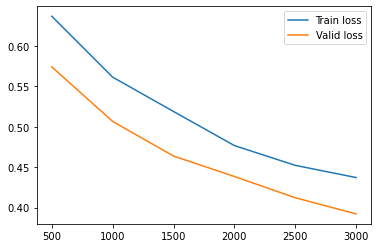

In [2]:
import matplotlib.pyplot as plt
plt.plot(x,tloss,label="Train loss")
plt.plot(x,vloss,label="Valid loss")
plt.legend()
plt.show()

In [37]:
##Making pred

# Make prediction
raw_pred,_,_ = trainer.predict(tokenized_dataset["valid"])

# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)
y_test = tokenized_dataset["valid"]["label"]

The following columns in the test set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: No Punc Title. If No Punc Title are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 6419
  Batch size = 16


In [38]:
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Metrics
print("Accuracy ",metrics.accuracy_score(y_test, y_pred)*100)
print("F1 Score ",metrics.f1_score(y_test, y_pred)*100)

Accuracy  82.6608505997819
F1 Score  84.65885596140592


Text(91.68, 0.5, 'predicted label')

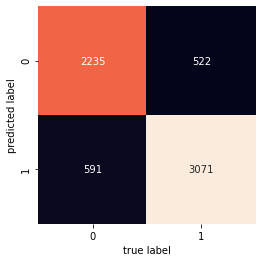

In [40]:
#Confustion Matrix heat map
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [41]:
#Classification Report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2826
           1       0.84      0.85      0.85      3593

    accuracy                           0.83      6419
   macro avg       0.82      0.82      0.82      6419
weighted avg       0.83      0.83      0.83      6419

